In [1]:
import imageio
import numpy as np
import scipy.ndimage
import astropy
from pylab import *

from astropy import modeling
from astropy.modeling.models import custom_model


In [2]:
dd=imageio.imread("image.png")[:,:,0]
dd.shape

(1960, 2618)

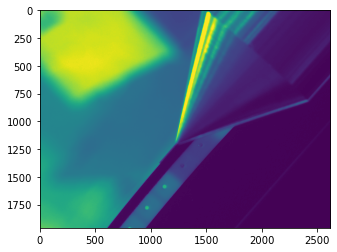

In [3]:
imshow(dd)

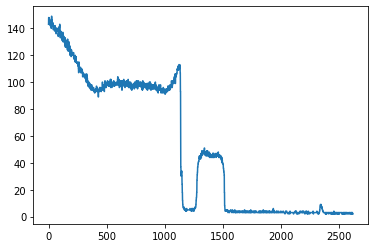

In [4]:
plot(dd[1300])

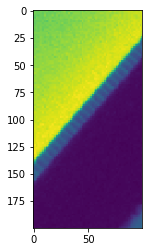

In [5]:
imshow(dd[1200:1400,1100:1200])

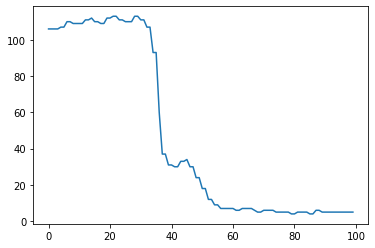

In [6]:
plot(dd[1300,1100:1200])

In [7]:
rotd = scipy.ndimage.interpolation.rotate(dd,-140)

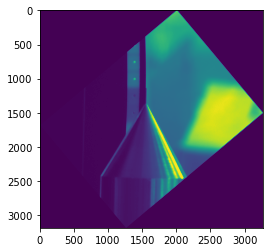

In [8]:
imshow(rotd)

# The Model

In [82]:
def fit_erf(x, mn, mx, sig, off):
    
    y = scipy.special.erf((x-off)/sig)
    y = y-y.min()
    y = y/y.max()

    y = y*(mx-mn) + mn
    return y


@custom_model
def erf1d(x, mn=0, mx=255, sig=.5, offset=0):
    
    return fit_erf(x, mn, mx, 2, offset)

fit = astropy.modeling.fitting.LevMarLSQFitter()

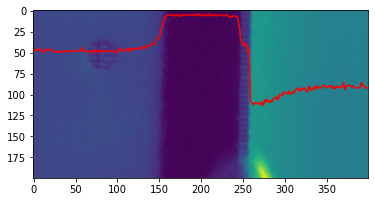

In [83]:
xmid = 1300
ymid = 1500
xsl = slice(xmid-100,xmid+100)
ysl = slice(ymid-200,ymid+200)
imshow(rotd[xsl,ysl]) 
plot(rotd[xmid, ysl], 'r')

# Fit across rows

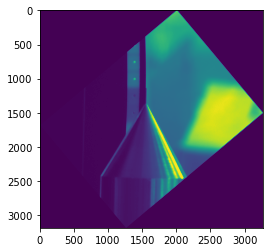

In [120]:
imshow(rotd)

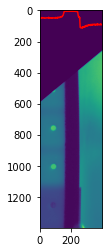

In [108]:
xmid = 1300
ymid = 1500
xsl = slice(xmid-1300,xmid+100)
ysl = slice(ymid-200,ymid+200)
imshow(rotd[xsl,ysl]) 
plot(rotd[xmid, ysl], 'r')

In [85]:
m.offset.value

1556.417749411676

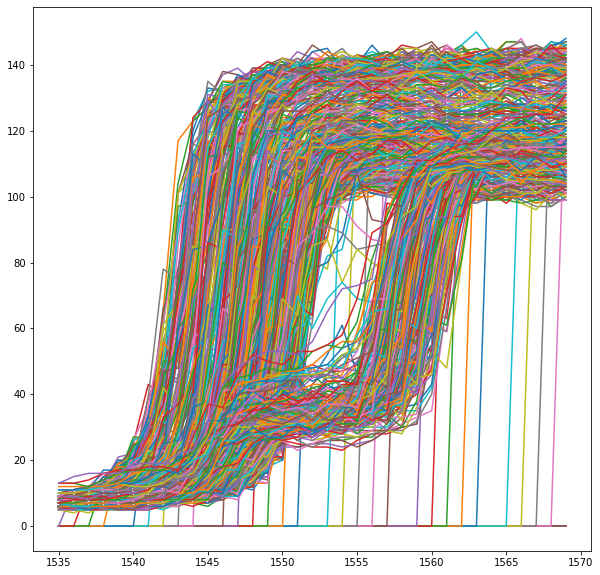

In [112]:
xs = np.arange(1535, 1570)

figure(figsize=(10,10))
cnt = 1
res = []
for i in np.arange(xmid-1300, xmid+75):
    #subplot(9,9,cnt)
    cnt += 1
    ys = rotd[i, xs]
    plot(xs,ys)
    m = fit(erf1d(mn=40, mx=110, offset=1558), xs, ys)
    #plot(xs, m(xs))
    
    res.append(m.parameters)
res = np.array(res)

In [117]:
mn, mx, sig, off = res.T

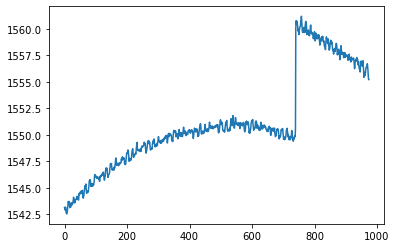

In [119]:
plot(off[400:])

In [115]:
res.shape

(1375, 4)

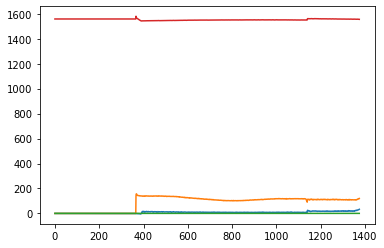

In [116]:
plot(res)

# Fit on a single line

Here I fit on a single row on the detector

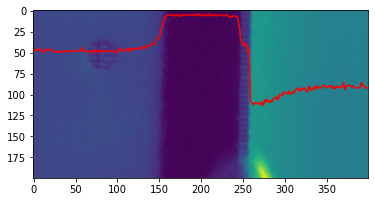

In [27]:
xmid = 1300
ymid = 1500
xsl = slice(xmid-100,xmid+100)
ysl = slice(ymid-200,ymid+200)
imshow(rotd[xsl,ysl]) 
plot(rotd[xmid, ysl], 'r')

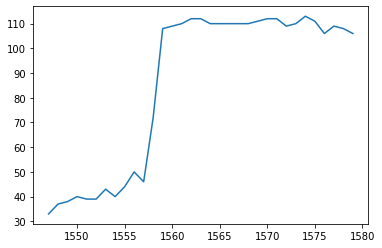

In [28]:
xs = np.arange(1547, 1580)
ys = rotd[xmid, xs]
plot(xs, ys)

In [13]:
m = fit(erf1d(mn=40, mx=110, offset=1558), xs, ys)

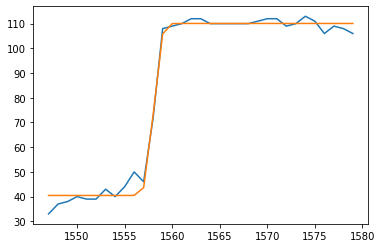

In [15]:
plot(xs, ys)
plot(xs, m(xs))

In [16]:
m

<erf1d(mn=40.464307, mx=110.07941563, sig=0.87482949, offset=1558.0437235)>